In [1]:
#Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
#Checkpoint 1: Data Cleaning 1


In [3]:
#importing companies and rounds2 dataset with proper encoding 
companies = pd.read_csv("companies.csv",encoding = 'ISO-8859-1')
rounds2 = pd.read_csv("rounds2.csv" ,encoding = 'ISO-8859-1')

In [4]:
#Table 1.1: Understand the Data Set 

In [5]:
#How many unique companies are present in rounds2?
#Since there are weird characters in data set hence encoding and decoding the same and converting to lower case before comparison
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())
rounds2.company_permalink.value_counts()

/organization/solarflare            19
/organization/exagen-diagnostics    18
/organization/quellan               18
/organization/semprius              18
/organization/vocalocity            17
                                    ..
/organization/twentyfour6            1
/organization/gaia-design            1
/organization/pushup-social          1
/organization/sitestar               1
/organization/apera                  1
Name: company_permalink, Length: 66368, dtype: int64

In [6]:
#How many unique companies are present in companies?
#Since there are weird characters in data set hence encoding and decoding the same and converting to lower case before comparison
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.apply(lambda x : x.lower())
companies.permalink.value_counts()

/organization/boulder-wind-power          1
/organization/loanz                       1
/organization/classbox                    1
/organization/uhma                        1
/organization/secureone-data-solutions    1
                                         ..
/organization/oneprovider-com             1
/organization/cloudadmin                  1
/organization/mtakso                      1
/organization/serveron                    1
/organization/apera                       1
Name: permalink, Length: 66368, dtype: int64

In [7]:
#Verifying the columns before they are used to merge the dataframes
def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1))))

com_permalink = sorted(companies.permalink.value_counts().index.to_list())
print(len(com_permalink))
round_permalink = sorted(rounds2.company_permalink.value_counts().index.to_list())
print(len(round_permalink))

#Verifying that there is no difference in two columns 
print(len(com_permalink)-len(round_permalink))
print(len(Diff(com_permalink,round_permalink)))

66368
66368
0
0


In [8]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
companies.set_index('permalink', inplace=True)
rounds2.set_index('company_permalink', inplace=True)
master_frame = pd.merge(companies,rounds2,how="inner",left_index=True,right_index=True)

#No. of observations in master_frame
print(len(master_frame.index))
master_frame.info()


114949
<class 'pandas.core.frame.DataFrame'>
Index: 114949 entries, /organization/-fame to /organization/zzzzapp-com
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   name                     114948 non-null  object 
 1   homepage_url             108815 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   state_code               104003 non-null  object 
 6   region                   104782 non-null  object 
 7   city                     104785 non-null  object 
 8   founded_at               94428 non-null   object 
 9   funding_round_permalink  114949 non-null  object 
 10  funding_round_type       114949 non-null  object 
 11  funding_round_code       31140 non-null   object 
 12  funded_at                114949 non-null  object 
 13  raised_amount_usd   

In [9]:
master_frame.head()

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [10]:
#Checkpoint 2: Funding Type Analysis
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [11]:
#Since Spark funds is interested in only 4 type of investments and hence filtering out other values using conditions
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [12]:
#Final Master Frame post filteration
master_frame.funding_round_type.value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [13]:
#Cleaning raised_amount_usd column before proceeding to calculate the  most representative value of the investment amount 
print((master_frame.raised_amount_usd.isnull().sum()/len(master_frame.index))*100)

#Dropping missing values as the percentage of missing values is less and its better to drop them rather than imputing over here to avoid any false analysis as this column plays a major role in analysis
master_frame= master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame['raised_amount_usd'].isnull().sum()

14.587327987118234


0

In [14]:
#1.Average funding amount to be used as representative amount of all the investment type as already mentioned in excel
#Also the entire dataset needs to considered here with outliers too therefore it would be another reason to calculate mean
funding = master_frame.groupby('funding_round_type')
round(funding['raised_amount_usd'].mean(),2)

funding_round_type
angel               958694.47
private_equity    73308593.03
seed                719818.00
venture           11748949.13
Name: raised_amount_usd, dtype: float64

In [15]:
#Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

#Adding new teporary column which will be deleted later to have value of amount raised in millions
master_frame['usd_million'] = round(master_frame['raised_amount_usd']/1000000,2)

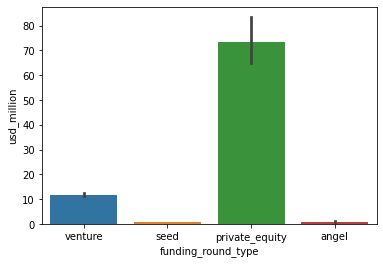

In [16]:
#Plotting bar plot to analyse the data better in terms of the average value of investment for each venture
sns.barplot(data=master_frame,x="funding_round_type", y="usd_million")
plt.show()

In [17]:
#2.Verifying the range of average value as per Spark Funds criteria to find which investment is the most suitable for Spark Funds
#Since the represntative method used above is mean hence using mean for verification

#round(funding['raised_amount_usd'].mean(),2)

angel_mean = 958694.47
private_equity_mean = 73308593.03
seed_mean = 719818.00
venture_mean = 11748949.13

if (angel_mean > 5000000.00 and angel_mean < 15000000.00):
    print ("Angel")
if (private_equity_mean > 5000000.00 and private_equity_mean < 15000000.00):
    print ("private_equity")
if (venture_mean > 5000000.00 and venture_mean < 15000000.00):
    print ("venture")
if (seed_mean > 5000000.00 and seed_mean < 15000000.00):
    print ("seed")

venture


In [18]:
#Deleting the temporary usd_million column created above for analysis 
del master_frame['usd_million']
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80627 entries, /organization/-fame to /organization/zzzzapp-com
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     80626 non-null  object 
 1   homepage_url             77182 non-null  object 
 2   category_list            79772 non-null  object 
 3   status                   80627 non-null  object 
 4   country_code             75606 non-null  object 
 5   state_code               74055 non-null  object 
 6   region                   74564 non-null  object 
 7   city                     74567 non-null  object 
 8   founded_at               67181 non-null  object 
 9   funding_round_permalink  80627 non-null  object 
 10  funding_round_type       80627 non-null  object 
 11  funding_round_code       28153 non-null  object 
 12  funded_at                80627 non-null  object 
 13  raised_amount_usd        80627 non-null  fl

In [19]:
#Checkpoint 3: Country Analysis

In [20]:
#1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
#Obtaining the top 9 countries
country_group = master_frame[master_frame.funding_round_type == 'venture'].groupby('country_code')
country_group['raised_amount_usd'].sum().sort_values(ascending= False).head(9)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [21]:
#2. For the chosen investment type, make a data frame named top9 with the top nine countries
#Creating a data fram with top 9 countries
top9 = master_frame[(master_frame.funding_round_type == "venture") & (master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']))]
top9.info()
top9.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44383 entries, /organization/-fame to /organization/zznode-science-and-technology-co-ltd
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     44383 non-null  object 
 1   homepage_url             42313 non-null  object 
 2   category_list            44118 non-null  object 
 3   status                   44383 non-null  object 
 4   country_code             44383 non-null  object 
 5   state_code               44096 non-null  object 
 6   region                   43934 non-null  object 
 7   city                     43934 non-null  object 
 8   founded_at               36619 non-null  object 
 9   funding_round_permalink  44383 non-null  object 
 10  funding_round_type       44383 non-null  object 
 11  funding_round_code       24783 non-null  object 
 12  funded_at                44383 non-null  object 
 13  raised_amount_usd 

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


In [22]:
# Analysing the Top 3 English-Speaking Countries
# As per the link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
# USA is there
# China is not there
# GBR is there
# IND is there
# Hence we have obtained the top 3 countries 
# first is USA
# second is GBR since China does not have English as official language
# third is India

In [23]:
#Checkpoint 4: Sector Analysis 1

In [24]:
#Verifying the category list column before proceeding 
print((master_frame['category_list'].isnull().sum()/len(master_frame.index))*100)
#Dropping null value columns as very less percentage of values are missing
master_frame = master_frame[~master_frame['category_list'].isnull()]

1.0604388108201968


In [25]:
# 1. Extract the primary sector of each category list from the category_list column
#The first value before the pipe is the primar sector and hence extracting it
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split("|")[0])
print(master_frame['primary_sector'])
print('')
print('')
master_frame.head()

/organization/-fame                                                   Media
/organization/-qounter                                Application Platforms
/organization/-the-one-of-them-inc-                                    Apps
/organization/0-6-com                                           Curated Web
/organization/0ndine-biomedical-inc                           Biotechnology
                                                              ...          
/organization/zzish                                               Analytics
/organization/zznode-science-and-technology-co-ltd      Enterprise Software
/organization/zzzzapp-com                                       Advertising
/organization/zzzzapp-com                                       Advertising
/organization/zzzzapp-com                                       Advertising
Name: primary_sector, Length: 79772, dtype: object




<ipython-input-25-3f1789ece0f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split("|")[0])


,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,Application Platforms
/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Biotechnology


In [26]:
# 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)
#Loading the mapping csv also with correct encoding just as a practice

mapping = pd.read_csv("mapping.csv",encoding = 'ISO-8859-1')
mapping.reset_index(inplace=True)


In [27]:
#Encoding and Decoding special characers if any before merging and aligning to the lower case for both
master_frame['primary_sector'] = master_frame['primary_sector'].str.encode('utf-8').str.decode('ascii', 'ignore')
mapping['category_list'] = mapping['category_list'].str.encode('utf-8').str.decode('ascii', 'ignore')

#Aligning the data wiht similar case
master_frame['primary_sector'] = master_frame['primary_sector'].apply(lambda x: str(x).lower())
mapping['category_list'] = mapping['category_list'].apply(lambda x: str(x).lower())


<ipython-input-27-4a9190cbe2f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector'] = master_frame['primary_sector'].str.encode('utf-8').str.decode('ascii', 'ignore')
<ipython-input-27-4a9190cbe2f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector'] = master_frame['primary_sector'].apply(lambda x: str(x).lower())


In [28]:
#Verifying the difference in two columns before merging 
def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1))))

master_sector_list = sorted(master_frame.primary_sector.value_counts().index.to_list())
mapping_sector_list = sorted(mapping.category_list.value_counts().index.to_list())

print(Diff(master_sector_list,mapping_sector_list))


['golf equipment', 'intellectual asset management', 'lead management', 'task management', 'registrars', 'promotional', 'natural resources', 'waste management', 'professional networking', 'greentech', 'english-speaking', 'specialty retail', 'personalization', 'adaptive equipment', 'navigation', 'personal health', 'journalism', 'medical professionals', 'china internet', 'contact management', 'nanotechnology', 'analytics', 'property management', 'self development', 'generation y-z', 'toys', 'deep information technology', 'project management', 'career management', 'biotechnology and semiconductor', 'darknet', 'skill gaming', 'social media advertising', 'testing', 'governance', 'internet tv', 'risk management', 'identity management', 'business analytics', 'innovation management', 'finance technology', 'vacation rentals', 'mobile analytics', 'internet technology', 'retirement', 'fleet management', 'supply chain management', 'cause marketing', 'financial services', 'digital signage', 'kinect'

In [29]:
#Replacing the 0 with na as observed in the difference above in the mappings table category list column
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace("0","na") if (("0" in x) & (x!="enterprise 2.0")) else x)


In [30]:
#Viewing the maping table
mapping.head()

,index,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,0,nan,0,1,0,0,0,0,0,0,0
1,1,3d,0,0,0,0,0,1,0,0,0
2,2,3d printing,0,0,0,0,0,1,0,0,0
3,3,3d technology,0,0,0,0,0,1,0,0,0
4,4,accounting,0,0,0,0,0,0,0,0,1


In [31]:
#Dropping blanks column form mappings table
del mapping['Blanks']


In [32]:
#Removing the first incorrect row and extra index column
mapping = mapping[mapping['category_list']!="nan"]
del mapping['index']
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,1,0,0,0,0


In [34]:
#Creating a column main sector in the mapping data frame with the value of the main sector which has 1 in the row value
#MApping primary sector to main sector
mapping.set_index('category_list')
mapping['main_sector'] = "x"
mapping['main_sector'] = [column for ind in mapping.index for column in mapping if (mapping[column][ind] == 1) ]


In [35]:
#Verifying if the main sector is retrieved correctly
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3d,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,1,0,0,0,0,Health


In [36]:
#Verification
mapping.set_index('category_list',inplace=True)


In [37]:
#Dropping extra columns before merging
mapping = mapping.drop(['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],axis=1)

In [38]:
#Joining master dataframe and mapping dataframe using primary sector column form the master_frame and index of mapping table which holds the category list values
master_frame = pd.merge(master_frame,mapping,how="inner",left_on="primary_sector",right_index=True)

In [39]:
#Verifyinf the updated master frame with primary sector mapped to main sector
master_frame.head()

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment
/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment
/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,media,Entertainment
/organization/akira-mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,media,Entertainment


In [40]:
#Checkpoint 5: Sector Analysis 2


In [41]:
# 1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

#All the columns of the master_frame along with the primary sector and the main sector

#The total number (or count) of investments for each main sector in a separate column

#The total amount invested in each main sector in a separate column


In [42]:
#Three data frames D1, D2 and D3 

In [43]:
#Dataframe D1
D1 = master_frame[(master_frame['country_code'] == "USA") & (master_frame['funding_round_type']=='venture') & ((master_frame['raised_amount_usd'] >= 5000000.00) & (master_frame['raised_amount_usd'] <= 15000000.00))]

#The total number (or count) of investments for each main sector in a separate column
X1= D1.main_sector.value_counts().to_frame()
print("The total number (or count) of investments for each main sector in a separate column for D1--------->")
print('')
print(X1)
print('')
X1.rename(columns = {'main_sector' :'count'},inplace=True)
D1 = pd.merge(D1,X1,how="inner",left_on='main_sector',right_index=True)

#The total amount invested in each main sector in a separate column
total1 = D1.groupby('main_sector')
Y1= total1['raised_amount_usd'].sum().to_frame()
Y1.rename(columns = {'raised_amount_usd' :'total_investment'},inplace=True)
print('')
print('The total amount invested in each main sector in a separate column for D1--------->')
print('')
print(Y1['total_investment'].sort_values(ascending=False))
D1 = pd.merge(D1,Y1,how="inner",left_on='main_sector',right_index=True)

The total number (or count) of investments for each main sector in a separate column for D1--------->

                                         main_sector
Others                                          2950
Social, Finance, Analytics, Advertising         2714
Cleantech / Semiconductors                      2350
News, Search and Messaging                      1583
Health                                           909
Manufacturing                                    799
Entertainment                                    591
Automotive & Sports                              167


The total amount invested in each main sector in a separate column for D1--------->

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Manufacturing                            

In [44]:
#Verifying D1
D1.head()

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count,total_investment
/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment,591,5.099198e+09
/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,media,Entertainment,591,5.099198e+09
/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,media,Entertainment,591,5.099198e+09
/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,media,Entertainment,591,5.099198e+09
/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,media,Entertainment,591,5.099198e+09


In [45]:
#D1 Dataframe
#1.Total number of investments (count)
print("Total number of investments (count) for D1: ",len(D1.index))
print('')
#2.Total amount of investment (USD)
print('Total amount of investment (USD) for D1: ',D1['raised_amount_usd'].sum())
print('')

#Visble in above executions
#3. Top sector (based on count of investments)
#4. Second-best sector (based on count of investments)
#5. Third-best sector (based on count of investments)
#6. Number of investments in the top sector (refer to point 3)
#7. Number of investments in the second-best sector (refer to point 4)
#8. Number of investments in the third-best sector (refer to point 5)


#9. For the top sector count-wise (point 3), which company received the highest investment?
print('For The top sector count-wise (point 3), which company received the highest investment for D1??????????')
print('')
print(D1[D1['main_sector']=="Others"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#10. For the second-best sector count-wise (point 4), which company received the highest investment?
print('For the second-best sector count-wise (point 4), which company received the highest investment for D1?????????')
print('')
print(D1[D1['main_sector']=="Social, Finance, Analytics, Advertising"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#For the third-best sector count-wise, which company received the highest investment?
print('For the third-best sector count-wise (point 4), which company received the highest investment for D1???????')
print('')
print(D1[D1['main_sector']=="Cleantech / Semiconductors"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))

Total number of investments (count) for D1:  12063

Total amount of investment (USD) for D1:  107757097294.0

For The top sector count-wise (point 3), which company received the highest investment for D1??????????

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
                          ...    
Campus Explorer         5000000.0
Campus Quad             5000000.0
Oculan                  5000000.0
NuView Systems          5000000.0
Dolls Kill              5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

For the second-best sector count-wise (point 4), which company received the highest investment for D1?????????

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
    

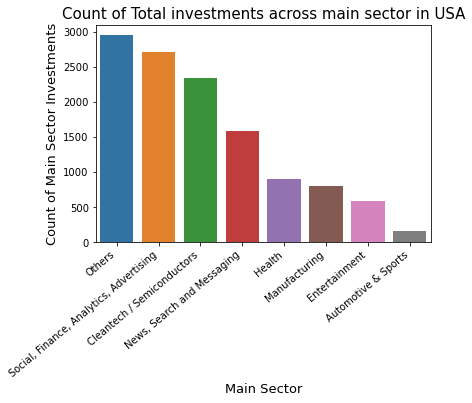

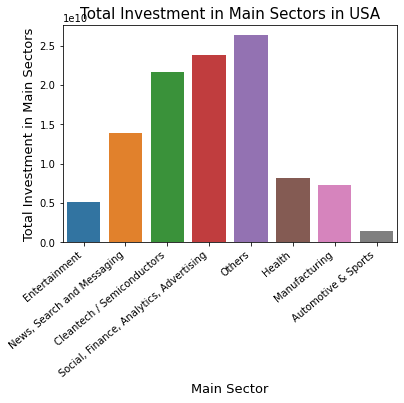

In [46]:
#Analysisng top sectors in D1
#On basis of count
pltd1a=sns.barplot(x= D1.main_sector.value_counts().index , y=D1.main_sector.value_counts())
pltd1a.set_xticklabels(pltd1a.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Count of Main Sector Investments',size=13)
plt.title('Count of Total investments across main sector in USA',size=15);
plt.show()

#On basis of total investment
pltd1b=sns.barplot(x= D1.main_sector , y=D1.total_investment)
pltd1b.set_xticklabels(pltd1b.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Total Investment in Main Sectors',size=13)
plt.title('Total Investment in Main Sectors in USA',size=15);
plt.show()

In [47]:
#Dataframe D2
D2 = master_frame[(master_frame['country_code'] == "GBR") & (master_frame['funding_round_type']=='venture') & ((master_frame['raised_amount_usd'] >= 5000000.00) & (master_frame['raised_amount_usd'] <= 15000000.00))]

#The total number (or count) of investments for each main sector in a separate column
X2= D2.main_sector.value_counts().to_frame()
print("The total number (or count) of investments for each main sector in a separate column for D2--------->")
print('')
print(X2)
print('')
X2.rename(columns = {'main_sector' :'count'},inplace=True)
D2 = pd.merge(D2,X2,how="inner",left_on='main_sector',right_index=True)

#The total amount invested in each main sector in a separate column
total2 = D2.groupby('main_sector')
Y2= total2['raised_amount_usd'].sum().to_frame()
Y2.rename(columns = {'raised_amount_usd' :'total_investment'},inplace=True)
print('')
print('The total amount invested in each main sector in a separate column for D2--------->')
print('')
print(Y2['total_investment'].sort_values(ascending=False))
D2 = pd.merge(D2,Y2,how="inner",left_on='main_sector',right_index=True)

The total number (or count) of investments for each main sector in a separate column for D2--------->

                                         main_sector
Others                                           147
Social, Finance, Analytics, Advertising          133
Cleantech / Semiconductors                       130
News, Search and Messaging                        73
Entertainment                                     56
Manufacturing                                     42
Health                                            24
Automotive & Sports                               16


The total amount invested in each main sector in a separate column for D2--------->

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                            

In [48]:
#D2 Dataframe
#1.Total number of investments (count)
print("Total number of investments (count) for D2: ",len(D2.index))
print('')
#2.Total amount of investment (USD)
print('Total amount of investment (USD) for D2: ',D2['raised_amount_usd'].sum())
print('')

#Visble in above executions
#3. Top sector (based on count of investments)
#4. Second-best sector (based on count of investments)
#5. Third-best sector (based on count of investments)
#6. Number of investments in the top sector (refer to point 3)
#7. Number of investments in the second-best sector (refer to point 4)
#8. Number of investments in the third-best sector (refer to point 5)


#9. For the top sector count-wise (point 3), which company received the highest investment?
print('For The top sector count-wise (point 3), which company received the highest investment for D2??????????')
print('')
print(D2[D2['main_sector']=="Others"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#10. For the second-best sector count-wise (point 4), which company received the highest investment?
print('For the second-best sector count-wise (point 4), which company received the highest investment for D2?????????')
print('')
print(D2[D2['main_sector']=="Social, Finance, Analytics, Advertising"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#For the third-best sector count-wise, which company received the highest investment?
print('For the third-best sector count-wise (point 4), which company received the highest investment for D2???????')
print('')
print(D2[D2['main_sector']=="Cleantech / Semiconductors"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))

Total number of investments (count) for D2:  621

Total amount of investment (USD) for D2:  5379078691.0

For The top sector count-wise (point 3), which company received the highest investment for D2??????????

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
                              ...    
Bacula Systems              5000000.0
Vector Watch                5000000.0
PhotoBox                    5000000.0
The Filter                  5000000.0
BullGuard                   5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

For the second-best sector count-wise (point 4), which company received the highest investment for D2?????????

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
               

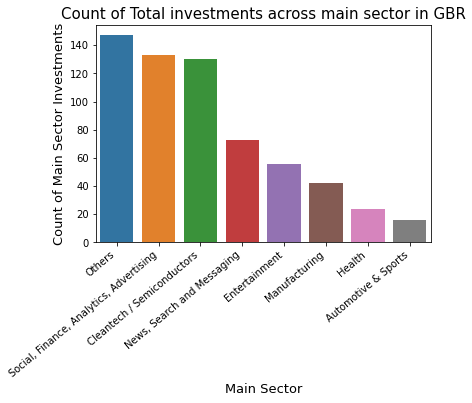

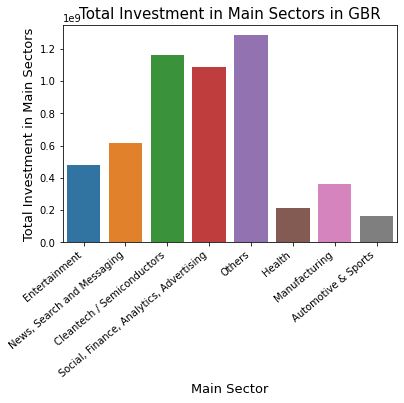

In [49]:
#Analysisng top sectors in D2
#On basis of count
pltd2a=sns.barplot(x= D2.main_sector.value_counts().index , y=D2.main_sector.value_counts())
pltd2a.set_xticklabels(pltd2a.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Count of Main Sector Investments',size=13)
plt.title('Count of Total investments across main sector in GBR',size=15);
plt.show()

#On basis of total investment
pltd2b=sns.barplot(x= D2.main_sector , y=D2.total_investment)
pltd2b.set_xticklabels(pltd2b.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Total Investment in Main Sectors',size=13)
plt.title('Total Investment in Main Sectors in GBR',size=15);
plt.show()

In [50]:
#Dataframe D3
D3 = master_frame[(master_frame['country_code'] == "IND") & (master_frame['funding_round_type']=='venture') & ((master_frame['raised_amount_usd'] >= 5000000.00) & (master_frame['raised_amount_usd'] <= 15000000.00))]

#The total number (or count) of investments for each main sector in a separate column
X3= D3.main_sector.value_counts().to_frame()
print("The total number (or count) of investments for each main sector in a separate column for D3--------->")
print('')
print(X3)
print('')
X3.rename(columns = {'main_sector' :'count'},inplace=True)
D3 = pd.merge(D3,X3,how="inner",left_on='main_sector',right_index=True)

#The total amount invested in each main sector in a separate column
total3 = D3.groupby('main_sector')
Y3= total3['raised_amount_usd'].sum().to_frame()
Y3.rename(columns = {'raised_amount_usd' :'total_investment'},inplace=True)
print('')
print('The total amount invested in each main sector in a separate column for D3--------->')
print('')
print(Y3['total_investment'].sort_values(ascending=False))
D3 = pd.merge(D3,Y3,how="inner",left_on='main_sector',right_index=True)

The total number (or count) of investments for each main sector in a separate column for D3--------->

                                         main_sector
Others                                           110
Social, Finance, Analytics, Advertising           60
News, Search and Messaging                        52
Entertainment                                     33
Manufacturing                                     21
Cleantech / Semiconductors                        20
Health                                            19
Automotive & Sports                               13


The total amount invested in each main sector in a separate column for D3--------->

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                   

In [51]:
#D3 Dataframe
#1.Total number of investments (count)
print("Total number of investments (count) for D3: ",len(D3.index))
print('')
#2.Total amount of investment (USD)
print('Total amount of investment (USD) for D3: ',D3['raised_amount_usd'].sum())
print('')

#Visble in above executions
#3. Top sector (based on count of investments)
#4. Second-best sector (based on count of investments)
#5. Third-best sector (based on count of investments)
#6. Number of investments in the top sector (refer to point 3)
#7. Number of investments in the second-best sector (refer to point 4)
#8. Number of investments in the third-best sector (refer to point 5)


#9. For the top sector count-wise (point 3), which company received the highest investment?
print('For The top sector count-wise (point 3), which company received the highest investment for D3??????????')
print('')
print(D3[D3['main_sector']=="Others"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#10. For the second-best sector count-wise (point 4), which company received the highest investment?
print('For the second-best sector count-wise (point 4), which company received the highest investment for D3?????????')
print('')
print(D3[D3['main_sector']=="Social, Finance, Analytics, Advertising"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))
print('')
#For the third-best sector count-wise, which company received the highest investment?
print('For the third-best sector count-wise (point 4), which company received the highest investment for D3???????')
print('')
print(D3[D3['main_sector']=="News, Search and Messaging"].groupby('name').raised_amount_usd.sum().sort_values(ascending=False))

Total number of investments (count) for D3:  328

Total amount of investment (USD) for D3:  2949543602.0

For The top sector count-wise (point 3), which company received the highest investment for D3??????????

name
FirstCry.com           39000000.0
Myntra                 38000000.0
CommonFloor            32900000.0
Pepperfry.com          28000000.0
ItzCash Card Ltd.      25000000.0
                          ...    
Voonik                  5000000.0
Appsdaily Solutions     5000000.0
Vriti Infocom           5000000.0
Ameyo                   5000000.0
Securens                5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

For the second-best sector count-wise (point 4), which company received the highest investment for D3?????????

name
Manthan Systems                                   50700000.0
Komli Media                                       28000000.0
ShopClues.com                                     25000000.0
inTarvo                                           2190000

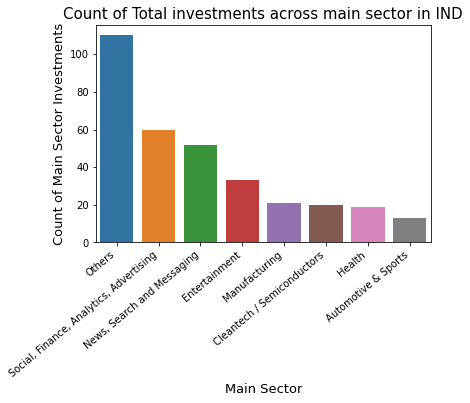

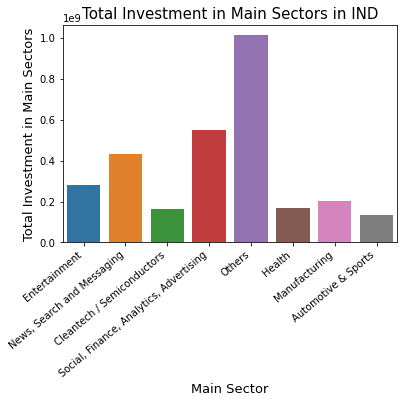

In [52]:
#Analysisng top sectors in D3
#On basis of count
pltd3a=sns.barplot(x= D3.main_sector.value_counts().index , y=D3.main_sector.value_counts())
pltd3a.set_xticklabels(pltd3a.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Count of Main Sector Investments',size=13)
plt.title('Count of Total investments across main sector in IND',size=15);
plt.show()

#On basis of total investment
pltd3b=sns.barplot(x= D3.main_sector , y=D3.total_investment)
pltd3b.set_xticklabels(pltd3b.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Main Sector',size=13)
plt.ylabel('Total Investment in Main Sectors',size=13)
plt.title('Total Investment in Main Sectors in IND',size=15);
plt.show()

In [53]:
#Checkpoint 6: Plots


In [54]:
#1.A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

plot1_master_frame = pd.merge(companies,rounds2,how="inner",left_index=True,right_index=True)

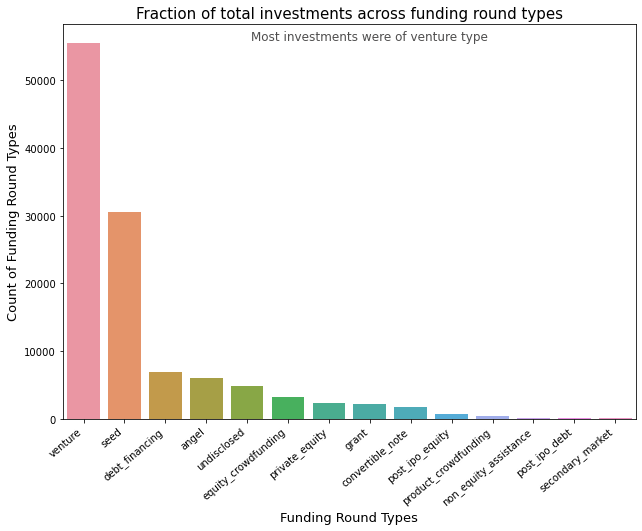

In [55]:
#count of investments for all funding round types
plt.figure(figsize=[9,7])
plot1a= sns.barplot(x=plot1_master_frame['funding_round_type'].value_counts().index, y=plot1_master_frame['funding_round_type'].value_counts())
plot1a.set_xticklabels(plot1a.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Funding Round Types',size=13)
plt.ylabel('Count of Funding Round Types',size=13)
plt.title('Fraction of total investments across funding round types',size=15);
plt.text(x=7, y=56000, s='Most investments were of venture type', 
                 color='#4f4e4e', fontsize=12, horizontalalignment='center')
plt.show()

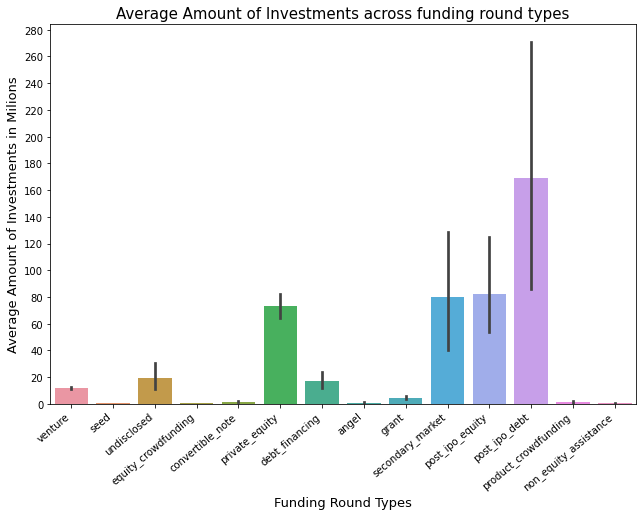

In [56]:
#average amount of investments for all funding round types
import matplotlib.ticker as ticker
plot1_master_frame['raised_amount_usd_milion']= plot1_master_frame['raised_amount_usd']/1000000
plt.figure(figsize=[9,7])
plot1b = sns.barplot(data=plot1_master_frame,x="funding_round_type",y="raised_amount_usd_milion")
plot1b.set_xticklabels(plot1b.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Funding Round Types',size=13)
plt.ylabel('Average Amount of Investments in Milions',size=13)
plot1b.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title('Average Amount of Investments across funding round types',size=15);
plt.show()

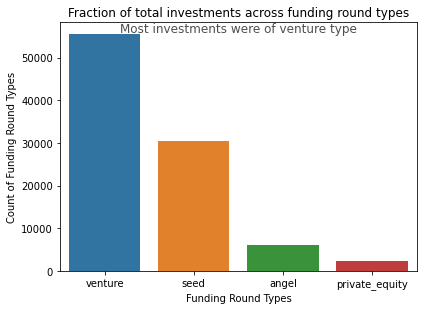

<ipython-input-57-4a323f540bf4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft['raised_amount_usd_milion']= ft['raised_amount_usd']/1000000


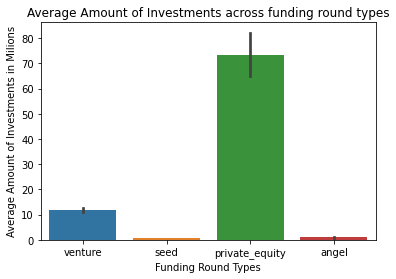

In [57]:
#Plot1
#count of investments for angel, venture, seed, and private equity
#creating new dataframe ft with only angel, venture, seed, and private equity funding type to plot count
ft = plot1_master_frame[plot1_master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]
sns.barplot(x=ft['funding_round_type'].value_counts().index, y=ft['funding_round_type'].value_counts())
plt.tight_layout()
plt.xlabel('Funding Round Types',size=10)
plt.ylabel('Count of Funding Round Types',size=10)
plt.title('Fraction of total investments across funding round types',size=12);
plt.text(x=1.5, y=56000, s='Most investments were of venture type', 
                 color='#4f4e4e', fontsize=12, horizontalalignment='center')
plt.show()

#average amount of investments for angel, venture, seed, and private equity
#using new dataframe ft with only angel, venture, seed, and private equity funding type to plot average of raised amount
ft['raised_amount_usd_milion']= ft['raised_amount_usd']/1000000
sns.barplot(data=ft,x="funding_round_type",y="raised_amount_usd_milion")
plt.xlabel('Funding Round Types',size=10)
plt.ylabel('Average Amount of Investments in Milions',size=10)
plt.title('Average Amount of Investments across funding round types',size=12);
plt.show()

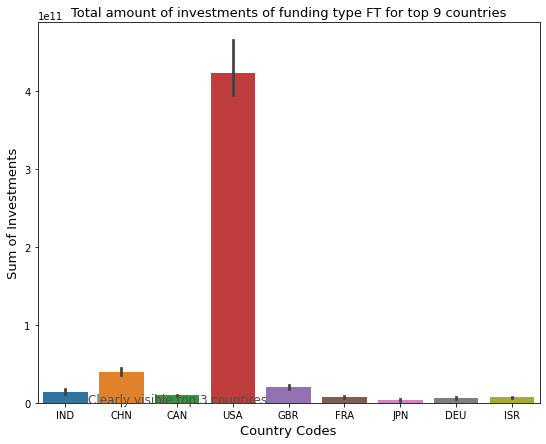

In [58]:
#Plot 2
#2.A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
#Plotting the required details using the top9 plot created above
plt.figure(figsize=[9,7])
plot2 = sns.barplot(data=top9,x="country_code",y="raised_amount_usd", estimator=np.sum)
plt.xlabel('Country Codes',size=13)
plt.ylabel('Sum of Investments',size=13)
plt.title('Total amount of investments of funding type FT for top 9 countries',size=13);
plt.text(x=2, y=4.5, s='Clearly visible top 3 countires',color='#4f4e4e', fontsize=12, horizontalalignment='center')
plt.show()



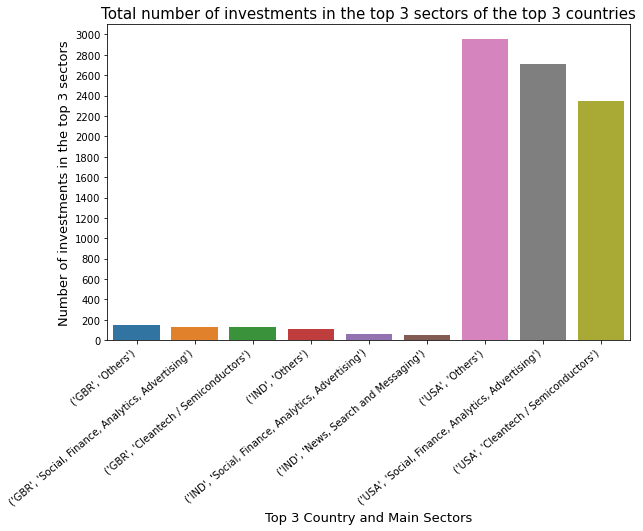

In [59]:
#Plot 3
#3.A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
d1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
d2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
d3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

all_df=pd.concat([d1,d2,d3])
group= all_df.groupby('country_code')

plt.figure(figsize=[9,7])
plot3= sns.barplot(x=all_df.groupby('country_code').main_sector.value_counts().index, y=all_df.groupby('country_code').main_sector.value_counts())
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('Top 3 Country and Main Sectors',size=13)
plt.ylabel('Number of investments in the top 3 sectors',size=13)
plot3.yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.title('Total number of investments in the top 3 sectors of the top 3 countries',size=15);
